In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist_data = pd.read_csv("/content/mnist.csv").values

labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# For image resizing
import cv2

X = digits
y = labels

In [2]:
def resize_images(images, original_size=(28, 28), new_size=(14, 14)):
    resized_images = np.empty((len(images), new_size[0] * new_size[1]))

    for i, image in enumerate(images):
        # Ensure the image is not empty
        if image.size == 0:
            raise ValueError(f"Empty image at index {i}")

        # Reshape the image to its original 2D shape
        reshaped_image = image.reshape(original_size).astype(np.uint8)

        # Resize the image
        resized = cv2.resize(reshaped_image, new_size, interpolation=cv2.INTER_AREA)

        # Flatten and store the resized image
        resized_images[i] = resized.flatten()

    return resized_images

# Test the function with a single image
X_resized = resize_images(X)

# Splitting the data: 5k for training and the rest for testing
# Stratify ensures we have similar distributions of labels on test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X_resized, y, train_size=5000, stratify=y, random_state=42)

In [3]:
# Define the SVC with RBF kernel
svc = SVC(kernel='rbf', gamma='scale')

# Create the parameter grid
param_grid = {'C': np.logspace(-4, 4, 50)}

# Initialize GridSearchCV with the parameter grid
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_model = grid_search.best_estimator_

# Print the best C value
print("Best C value:", best_model.C)

# Print the gamma value used
print("Gamma value used:", best_model.gamma)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best C value: 24.420530945486497
Gamma value used: scale


In [9]:
# Calculate the actual gamma value used when gamma='scale'
actual_gamma_value = 1 / (X_train.shape[1] * X_train.var())
print("Actual gamma value used:", actual_gamma_value)

Actual gamma value used: 1.0008525210867847e-06


In [4]:
# Access the cv_results_
results = grid_search.cv_results_

# Iterate over the results and print the 'C' value and corresponding mean test score
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"C: {params['C']}, Mean CV Score: {mean_score}")

C: 0.0001, Mean CV Score: 0.1116
C: 0.00014563484775012445, Mean CV Score: 0.1116
C: 0.00021209508879201905, Mean CV Score: 0.1116
C: 0.00030888435964774815, Mean CV Score: 0.1116
C: 0.0004498432668969444, Mean CV Score: 0.1116
C: 0.0006551285568595509, Mean CV Score: 0.1116
C: 0.0009540954763499944, Mean CV Score: 0.1116
C: 0.0013894954943731374, Mean CV Score: 0.1116
C: 0.0020235896477251557, Mean CV Score: 0.1116
C: 0.0029470517025518097, Mean CV Score: 0.1116
C: 0.004291934260128779, Mean CV Score: 0.11300000000000002
C: 0.0062505519252739694, Mean CV Score: 0.26399999999999996
C: 0.009102981779915217, Mean CV Score: 0.461
C: 0.013257113655901081, Mean CV Score: 0.675
C: 0.019306977288832496, Mean CV Score: 0.7564
C: 0.02811768697974228, Mean CV Score: 0.8503999999999999
C: 0.040949150623804234, Mean CV Score: 0.875
C: 0.05963623316594643, Mean CV Score: 0.8942
C: 0.08685113737513521, Mean CV Score: 0.9046
C: 0.12648552168552957, Mean CV Score: 0.9166000000000001
C: 0.1842069969326

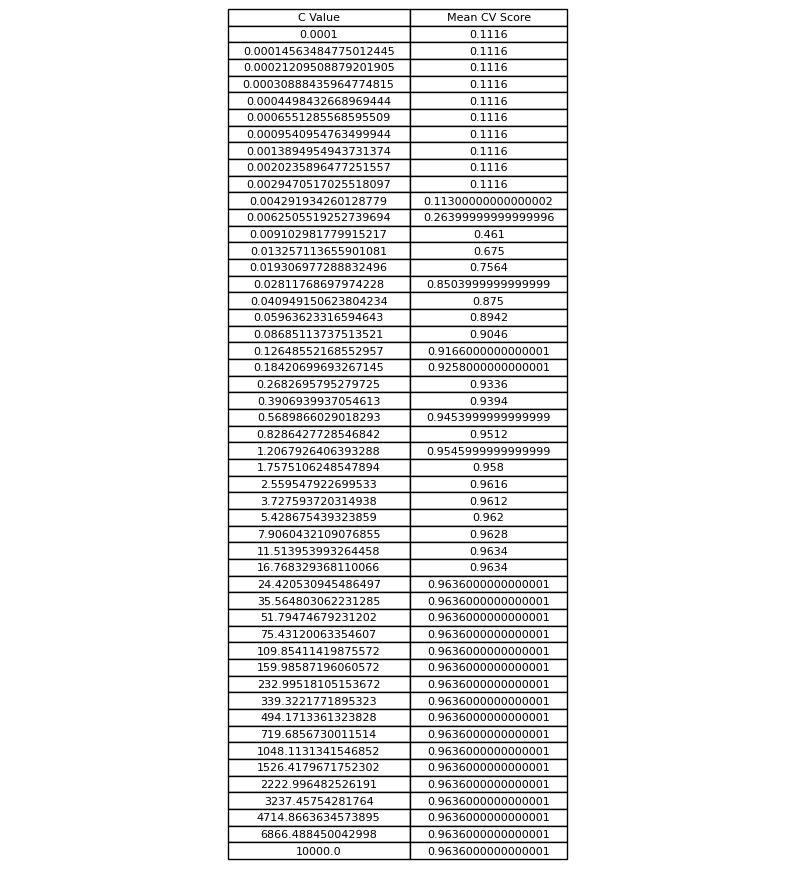

In [12]:
c_values = [
    0.0001, 0.00014563484775012445, 0.00021209508879201905, 0.00030888435964774815,
    0.0004498432668969444, 0.0006551285568595509, 0.0009540954763499944, 0.0013894954943731374,
    0.0020235896477251557, 0.0029470517025518097, 0.004291934260128779, 0.0062505519252739694,
    0.009102981779915217, 0.013257113655901081, 0.019306977288832496, 0.02811768697974228,
    0.040949150623804234, 0.05963623316594643, 0.08685113737513521, 0.12648552168552957,
    0.18420699693267145, 0.2682695795279725, 0.3906939937054613, 0.5689866029018293,
    0.8286427728546842, 1.2067926406393288, 1.7575106248547894, 2.559547922699533,
    3.727593720314938, 5.428675439323859, 7.9060432109076855, 11.513953993264458,
    16.768329368110066, 24.420530945486497, 35.564803062231285, 51.79474679231202,
    75.43120063354607, 109.85411419875572, 159.98587196060572, 232.99518105153672,
    339.3221771895323, 494.1713361323828, 719.6856730011514, 1048.1131341546852,
    1526.4179671752302, 2222.996482526191, 3237.45754281764, 4714.8663634573895,
    6866.488450042998, 10000.0
]

mean_cv_scores = [
    0.1116, 0.1116, 0.1116, 0.1116, 0.1116, 0.1116, 0.1116, 0.1116, 0.1116, 0.1116,
    0.11300000000000002, 0.26399999999999996, 0.461, 0.675, 0.7564, 0.8503999999999999,
    0.875, 0.8942, 0.9046, 0.9166000000000001, 0.9258000000000001, 0.9336, 0.9394,
    0.9453999999999999, 0.9512, 0.9545999999999999, 0.958, 0.9616, 0.9612, 0.962,
    0.9628, 0.9634, 0.9634, 0.9636000000000001, 0.9636000000000001, 0.9636000000000001,
    0.9636000000000001, 0.9636000000000001, 0.9636000000000001, 0.9636000000000001,
    0.9636000000000001, 0.9636000000000001, 0.9636000000000001, 0.9636000000000001,
    0.9636000000000001, 0.9636000000000001, 0.9636000000000001, 0.9636000000000001,
    0.9636000000000001, 0.9636000000000001
]

df = pd.DataFrame({
    'C Value': c_values,
    'Mean CV Score': mean_cv_scores
})

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Improve the visual layout of the table
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust the font size as needed
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.show()

Accuracy on the test set: 0.9587567567567568


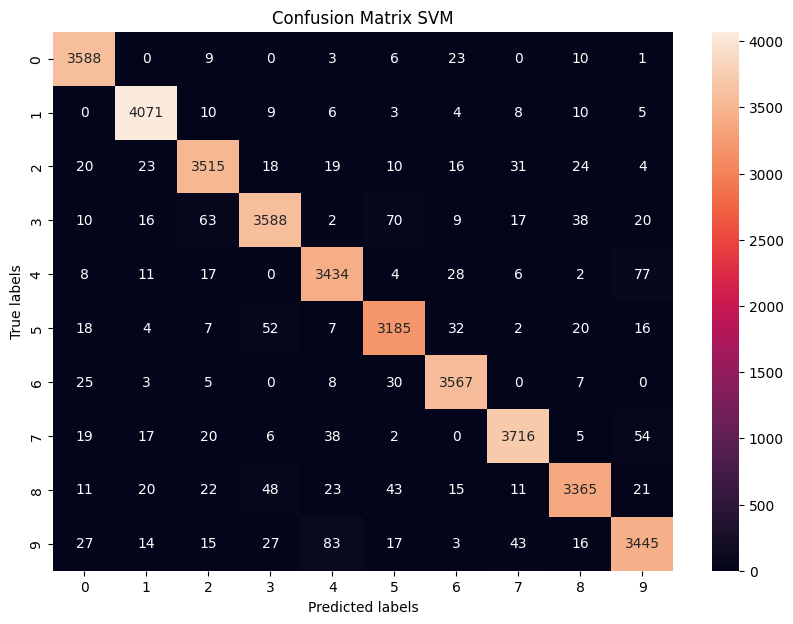

In [10]:
# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix SVM')
plt.show()

In [8]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3640
           1       0.97      0.99      0.98      4126
           2       0.95      0.96      0.95      3680
           3       0.96      0.94      0.95      3833
           4       0.95      0.96      0.95      3587
           5       0.95      0.95      0.95      3343
           6       0.96      0.98      0.97      3645
           7       0.97      0.96      0.96      3877
           8       0.96      0.94      0.95      3579
           9       0.95      0.93      0.94      3690

    accuracy                           0.96     37000
   macro avg       0.96      0.96      0.96     37000
weighted avg       0.96      0.96      0.96     37000



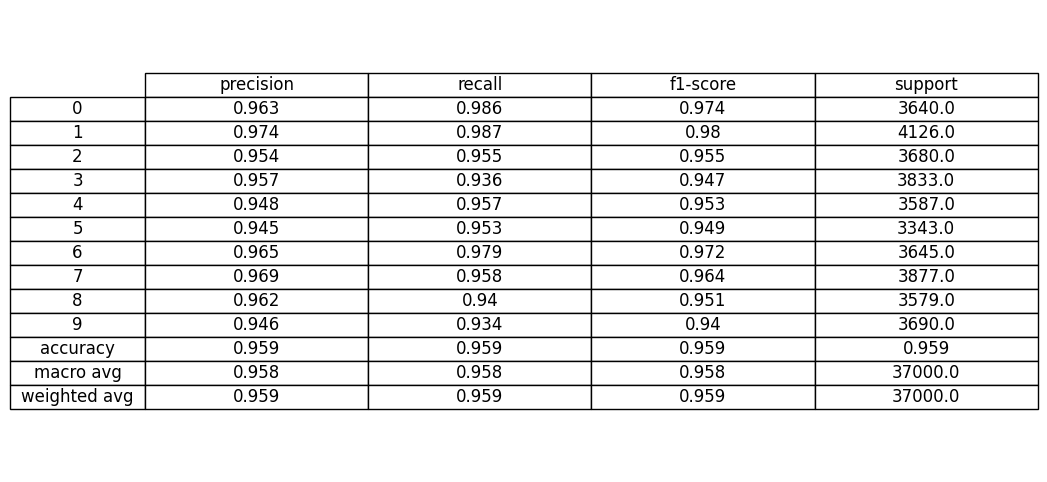

In [25]:
# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose().round(3)

# Plot the DataFrame as a styled table
fig, ax = plt.subplots(figsize=(10, 6))  # Size for visibility, adjust as necessary
ax.axis('off')  # Hide the axis

# Create a table and use the DataFrame values
the_table = plt.table(cellText=report_df.values,
                      colWidths=[0.2]*len(report_df.columns),
                      rowLabels=report_df.index,
                      colLabels=report_df.columns,
                      cellLoc='center', rowLoc='center',
                      loc='center')

the_table.scale(1.2, 1.2)

# Adjust the table style
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)  # Adjust as appropriate
the_table.scale(1.2, 1.2)  # May need to adjust scaling to fit your particular display

# Display the table
plt.show()